In [13]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import nltk

In [26]:
import numpy as np

In [2]:
df=pd.read_csv("RESUME_DATA.csv")

In [29]:
df

,Resumes,Category
0,kanumuru deepak reddy career objective secure ...,React JS Developer Resume
1,haripriya battina experience ui developer reac...,React JS Developer Resume
2,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume
3,naveen sadhu title software developer location...,React JS Developer Resume
4,fullstack software developer web developer pav...,React JS Developer Resume
...,...,...
74,workday hcm fcm name kumar role workday consul...,Workday Resume
75,venkateswarlu b workday consultant professiona...,Workday Resume
76,vinay kumar v workday functional consultant ex...,Workday Resume
77,name ravali p curriculum vitae specialization ...,internship Resume


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [9]:
def preprocess(txt):
    txt = txt.lower()                                              
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                     
    txt = re.sub('http\S+\s*', ' ', txt)                                          
    txt = re.sub('RT|cc', ' ', txt)                                               
    txt = re.sub('#\S+', '', txt)                                                 
    txt = re.sub('@\S+', '  ', txt)                                               
    txt = re.sub('\s+', ' ', txt)                                                 
    txt = nltk.tokenize.word_tokenize(txt)                                       
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     
    return ' '.join(txt)                                                          
     


In [14]:
df['Resumes'] = df['Resumes'].apply(lambda w: preprocess(w))

In [15]:
df.to_csv('Resume.csv', index=False)

In [21]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 361), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('technical', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 125), ('custom', 124), ('js', 123

In [22]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tharun\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tharun\AppData\Roaming\nltk_data...


In [23]:
from wordcloud import WordCloud

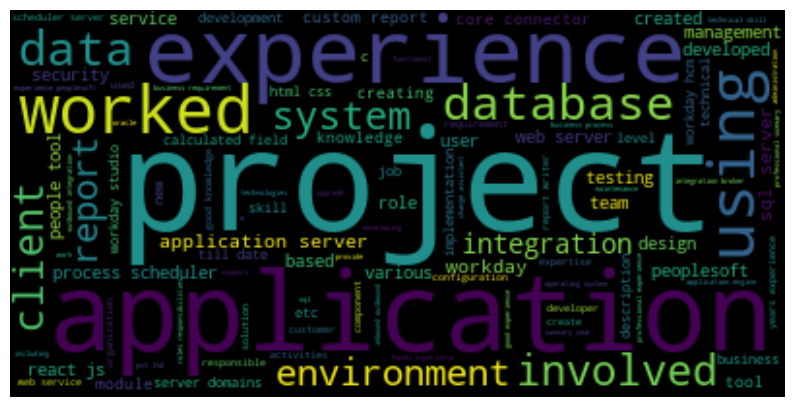

In [24]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume',
       'internship Resume'], dtype=object)

In [28]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 22  anubhav kumar singh core competencies scriptin...  PeopleSoft Resume
 23  g ananda rayudu www linkedin com anandgudapati...  PeopleSoft Resume
 24  peoplesoft database administrator gangareddy p...  PeopleSoft Resume
 25  classification internal classification interna...  PeopleSoft Resume
 26  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 27  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 28  peoplesoft administrator srinivas k experience...  PeopleSoft Resume
 29  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resume
 30  vinod akkala peoplesoft dba admin professional...  PeopleSoft Resume
 31  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 32  peoplesoft administration vivekanand sayana ca...  PeopleSoft Resume
 33  arun venu experience summary experience years ...  PeopleSoft Resume
 34  personal details name pritam bisw

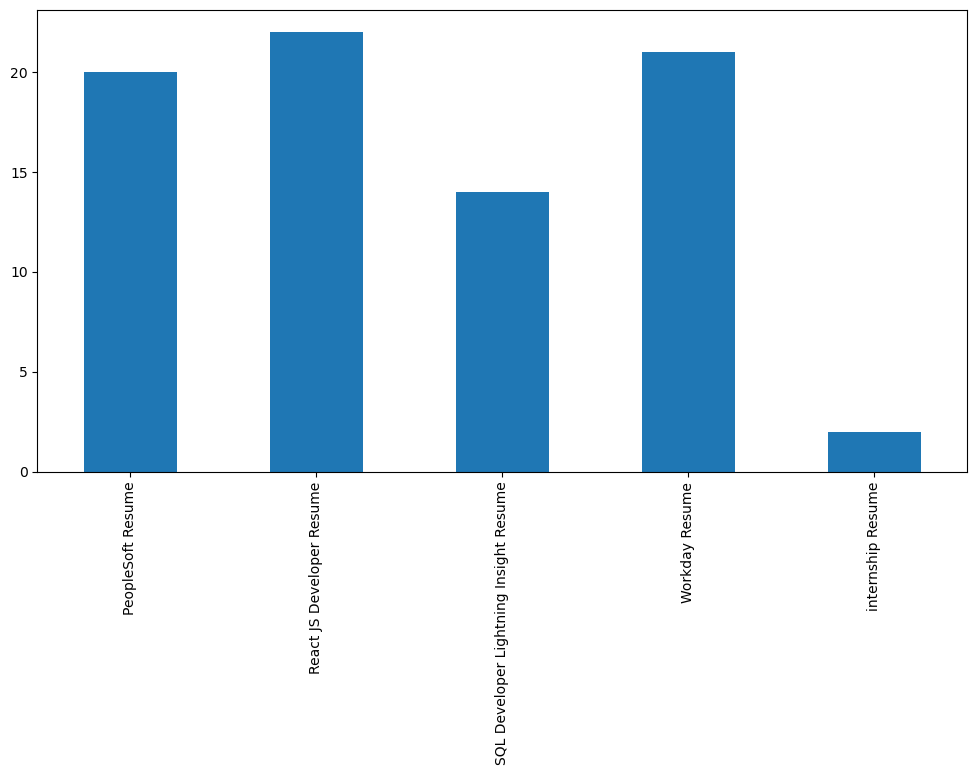

In [30]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [31]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [33]:

PLOT_PALETTE = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

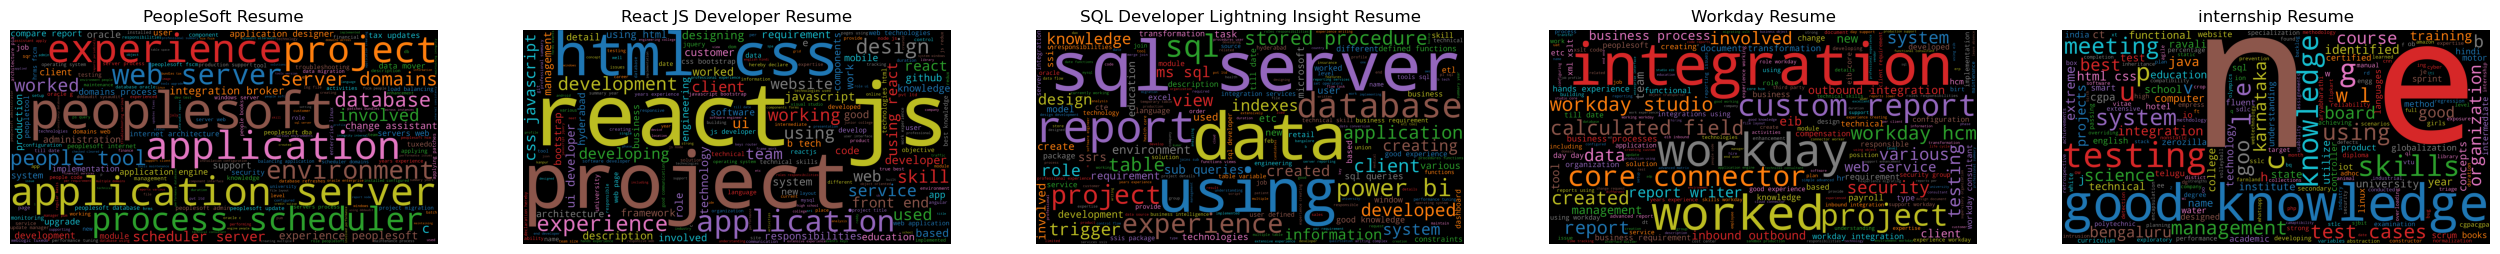

In [34]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [35]:

def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

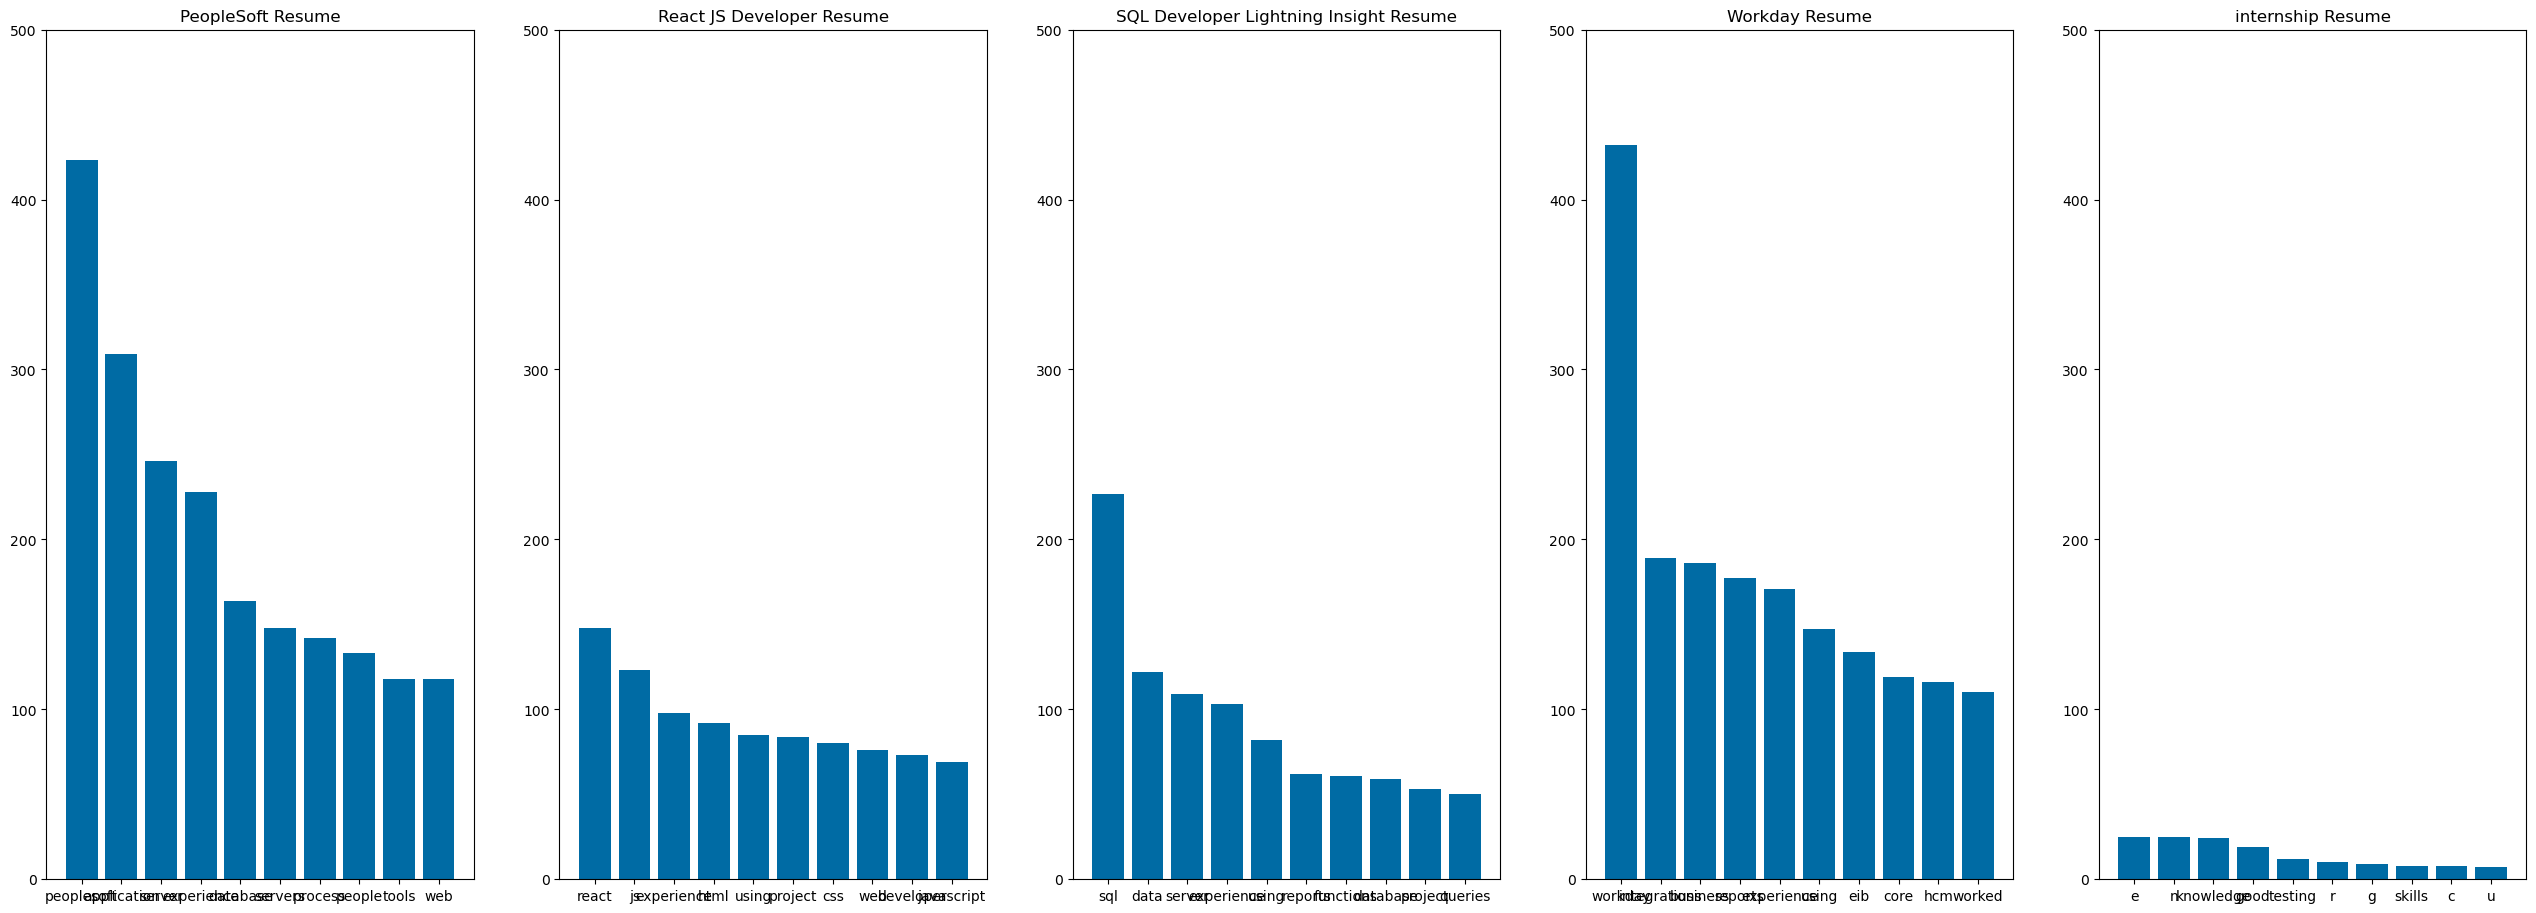

In [36]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()
     

In [54]:
df["Category"].value_counts()

React JS Developer Resume                 22
Workday Resume                            21
PeopleSoft Resume                         20
SQL Developer Lightning Insight Resume    14
internship Resume                          2
Name: Category, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [64]:
df["Category"].value_counts()

1    22
3    21
0    20
2    14
4     2
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

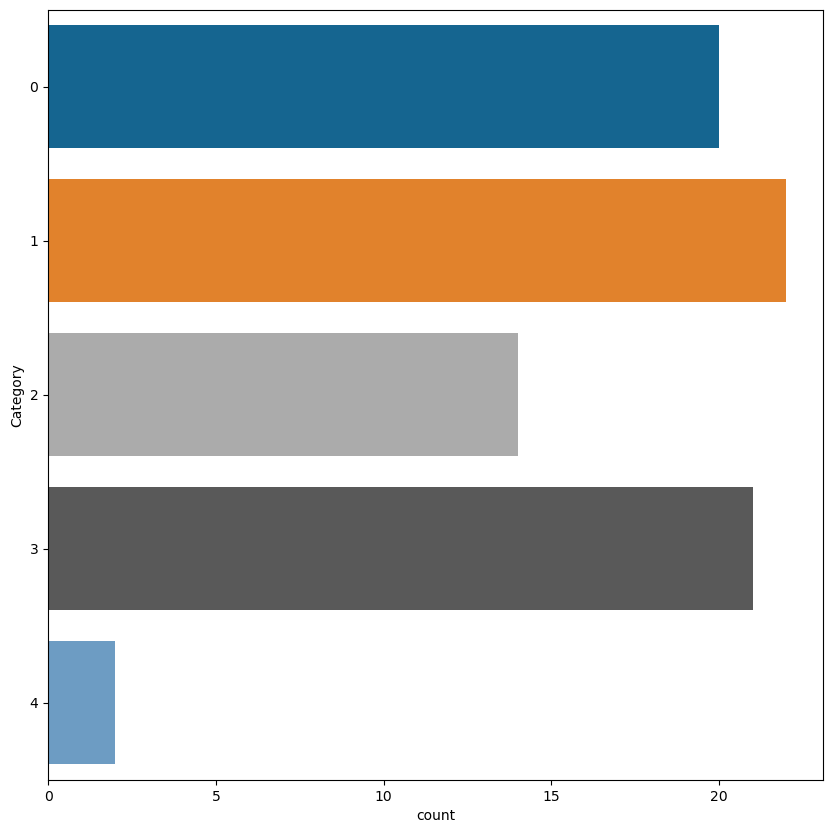

In [62]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

In [68]:
df

,Resumes,Category
0,kanumuru deepak reddy career objective secure ...,1
1,haripriya battina experience ui developer reac...,1
2,kamalakar reddy linked www linkedin com kamala...,1
3,naveen sadhu title software developer location...,1
4,fullstack software developer web developer pav...,1
...,...,...
74,workday hcm fcm name kumar role workday consul...,3
75,venkateswarlu b workday consultant professiona...,3
76,vinay kumar v workday functional consultant ex...,3
77,name ravali p curriculum vitae specialization ...,4


In [65]:
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']

In [67]:
targetLabels 

0    1
1    3
2    0
3    2
4    4
Name: index, dtype: int64

In [66]:
targetCounts

0    22
1    21
2    20
3    14
4     2
Name: Category, dtype: int64

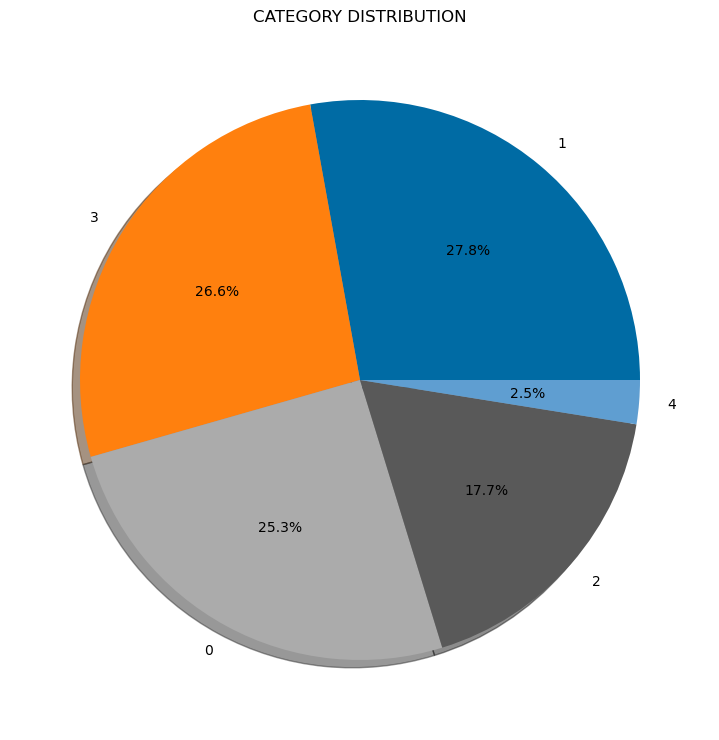

In [69]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)